# Detection of Outliers and Novel Data

+ Boxplot
+ Isolation forests
+ One-class SVM

Outliers don't belong to the dataset.

Novelties belong to the dataset. They're just novel or different.

In [7]:
import pandas, seaborn
tips = pandas.read_csv('../../Datasets/tips.csv')

In [8]:
tips['tip_rate'] = tips['tip']/tips['total_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


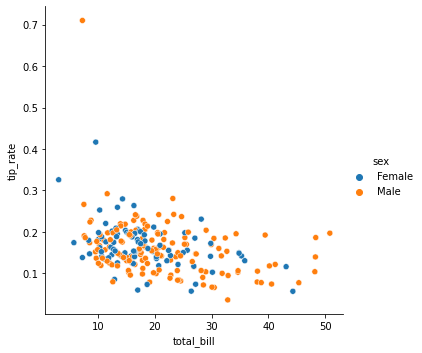

In [18]:
seaborn.relplot(data=tips, x='total_bill', y='tip_rate', hue='sex')

What are the stories?

+ The higher the bill, the less the tip rate.
+ People tend to tip between 10-20%.
+ Some guy tipped more than 70%, for a small meal.
+ Another guy tipped less than 5%, for a large meal.

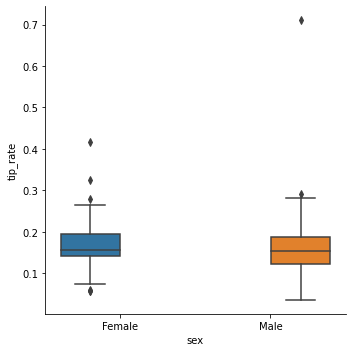

In [12]:
seaborn.catplot(data=tips, x='sex', y='tip_rate', hue='sex', kind='box')

In [15]:
female_tips = tips[ (tips['sex']=='Female')]['tip_rate']

In [16]:
female_tips

0      0.059447
4      0.146808
11     0.141804
14     0.203641
16     0.161665
         ...   
226    0.198216
229    0.130199
238    0.130338
240    0.073584
243    0.159744
Name: tip_rate, Length: 87, dtype: float64

This is a numerical variable.

The boxplot is a way to detect outliers. How?

The plot has 5 things: Q0, Q1, Q2, Q3, and Q4.

Q1 is the 25-percentile mark.

Q2 is the median.

Q3 is the 75-percentile mark.

The box defined by [Q1, Q3] has 50% of the data.

Q0 is the mimimum item that is not an outlier.

Q4 is the maximum item that is not an outlier.



In [17]:
female_tips.describe()

count    87.000000
mean      0.166491
std       0.053632
min       0.056433
25%       0.140416
50%       0.155581
75%       0.194266
max       0.416667
Name: tip_rate, dtype: float64

To determine outliers, we specify two boundaries/thresholds

IQR = Q3-Q1.  This is the height of the box, which contains 50% of the data.

+ Q1 - 1.5*IQR
+ Q3 + 1.5*IQR

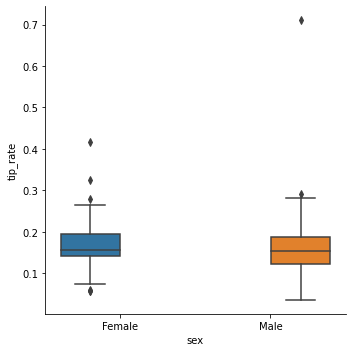

In [19]:
seaborn.catplot(data=tips, x='sex', y='tip_rate', hue='sex', kind='box')

In [20]:
female_tips.describe()

count    87.000000
mean      0.166491
std       0.053632
min       0.056433
25%       0.140416
50%       0.155581
75%       0.194266
max       0.416667
Name: tip_rate, dtype: float64

In [22]:
IQR = 0.194266 - 0.140416
IQR

0.05384999999999998

In [24]:
0.140416 - 1.5*IQR, 0.194266 + 1.5*IQR

(0.05964100000000004, 0.275041)

Everything in this range is considered "inliers".  Outside of this range is consider outliers.

In [26]:
[7, 10, 18, 30, 40, 51, 60, 62]

[7, 10, 18, 30, 40, 51, 60, 62]

The median (Q2) is (30+40)/2 = 35.

The 25-percentile (Q1) is (10+18)/2 = 14.

The 75-percentile (Q3) is (51+60)/2 = 55.5

Q0 = Q1 - 1.5*IQR

Q4 = Q3 + 1.5*IQR


### One-class SVM

In [2]:
import pandas, seaborn

admission = pandas.read_csv('../../Datasets/admission.csv')
heart_failures = pandas.read_csv('../../Datasets/HeartFailures/heart_failures.csv')

In [5]:
alive = heart_failures[ heart_failures.DEATH_EVENT == 0]

In [6]:
alive

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
20,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0
33,50.0,1,159,1,30,0,302000.0,1.2,138,0,0,29,0
38,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0


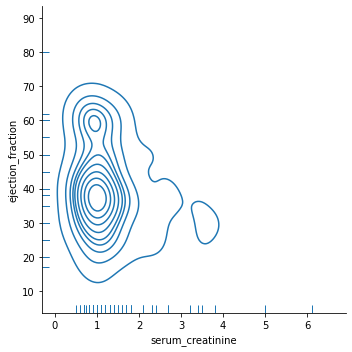

In [16]:
seaborn.displot(data=alive, 
                x='serum_creatinine', 
                y='ejection_fraction',
                kind='kde',
                rug=True,
                fill=False,
)

In [27]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

X = alive[['serum_creatinine','ejection_fraction']]
ocsvm = OneClassSVM()
ocsvm.fit(X)

OneClassSVM()

In [28]:
ocsvm.predict(X)

array([-1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,
        1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,
       -1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,
        1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1,
        1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1,
        1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,
       -1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1])

In [31]:
alive['novelty'] = ocsvm.predict(X)
alive

/var/folders/b5/d9dklfjj6jsdgbt3rxf0_lyh0000gn/T/ipykernel_48314/2190939158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alive['novelty'] = ocsvm.predict(X)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,novelty
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0,-1
20,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0,-1
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0,-1
33,50.0,1,159,1,30,0,302000.0,1.2,138,0,0,29,0,-1
38,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0,1
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0,1
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0,-1
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0,1


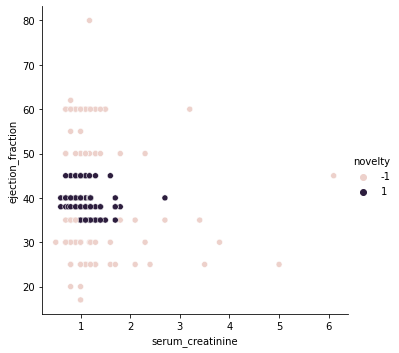

In [36]:
import seaborn

seaborn.relplot(data=alive, x='serum_creatinine', y='ejection_fraction', hue='novelty')

In [37]:
isof = IsolationForest()
isof.fit(X)

IsolationForest()

In [38]:
isof.predict(X)

array([ 1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1])

In [40]:
alive['outliers'] = isof.predict(X)

/var/folders/b5/d9dklfjj6jsdgbt3rxf0_lyh0000gn/T/ipykernel_48314/3531042112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alive['outliers'] = isof.predict(X)


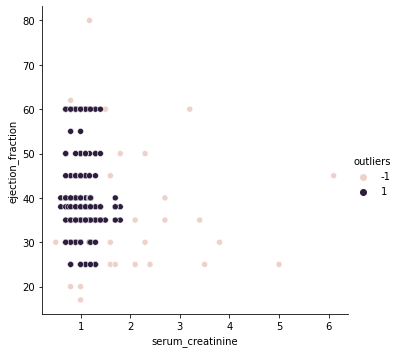

In [41]:
seaborn.relplot(data=alive, x='serum_creatinine', y='ejection_fraction', hue='outliers')

In [44]:
dead = heart_failures[ heart_failures.DEATH_EVENT == 1]
X = dead[['serum_creatinine','ejection_fraction']]

In [46]:
model = IsolationForest()
model.fit(X)
model.predict(X)
dead['outlier'] = model.predict(X)

/var/folders/b5/d9dklfjj6jsdgbt3rxf0_lyh0000gn/T/ipykernel_48314/3477853156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead['outlier'] = model.predict(X)


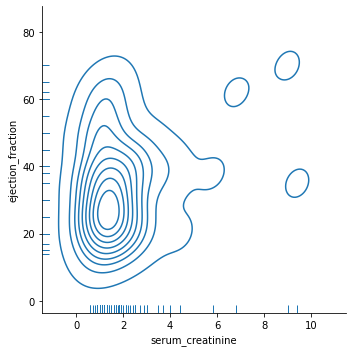

In [50]:
seaborn.displot(data=dead, x='serum_creatinine', y='ejection_fraction', 
                kind='kde', rug=True, fill=False)

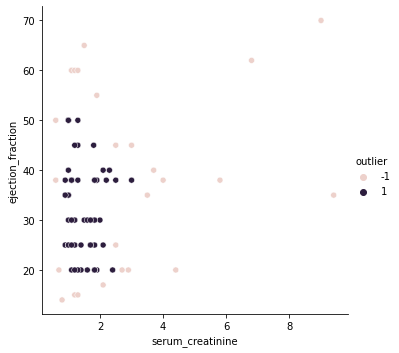

In [51]:
seaborn.relplot(data=dead, x='serum_creatinine', y='ejection_fraction',
               hue='outlier')